Model: kNN, n_neighbors=5, weights=uniform
[[48  5]
 [ 1 89]]
Accuracy:  95.8%, Sensivity:  90.57%, Specificity:  98.89%, F1 Score:  96.74%
Model: kNN, n_neighbors=5, weights=distance
[[48  5]
 [ 1 89]]
Accuracy:  95.8%, Sensivity:  90.57%, Specificity:  98.89%, F1 Score:  96.74%
Model: SVM, kernel=linear
[[51  2]
 [ 4 86]]
Accuracy:  95.8%, Sensivity:  96.23%, Specificity:  95.56%, F1 Score:  96.63%
Model: SVM, kernel=rbf
[[51  2]
 [ 2 88]]
Accuracy:  97.2%, Sensivity:  96.23%, Specificity:  97.78%, F1 Score:  97.78%
Model: LR, C=1
[[51  2]
 [ 3 87]]
Accuracy:  96.5%, Sensivity:  96.23%, Specificity:  96.67%, F1 Score:  97.21%
Model: LR, C=100
[[50  3]
 [ 6 84]]
Accuracy:  93.71%, Sensivity:  94.34%, Specificity:  93.33%, F1 Score:  94.92%
Model: DecisionTree, max_depth=5
[[50  3]
 [11 79]]
Accuracy:  90.21%, Sensivity:  94.34%, Specificity:  87.78%, F1 Score:  91.86%


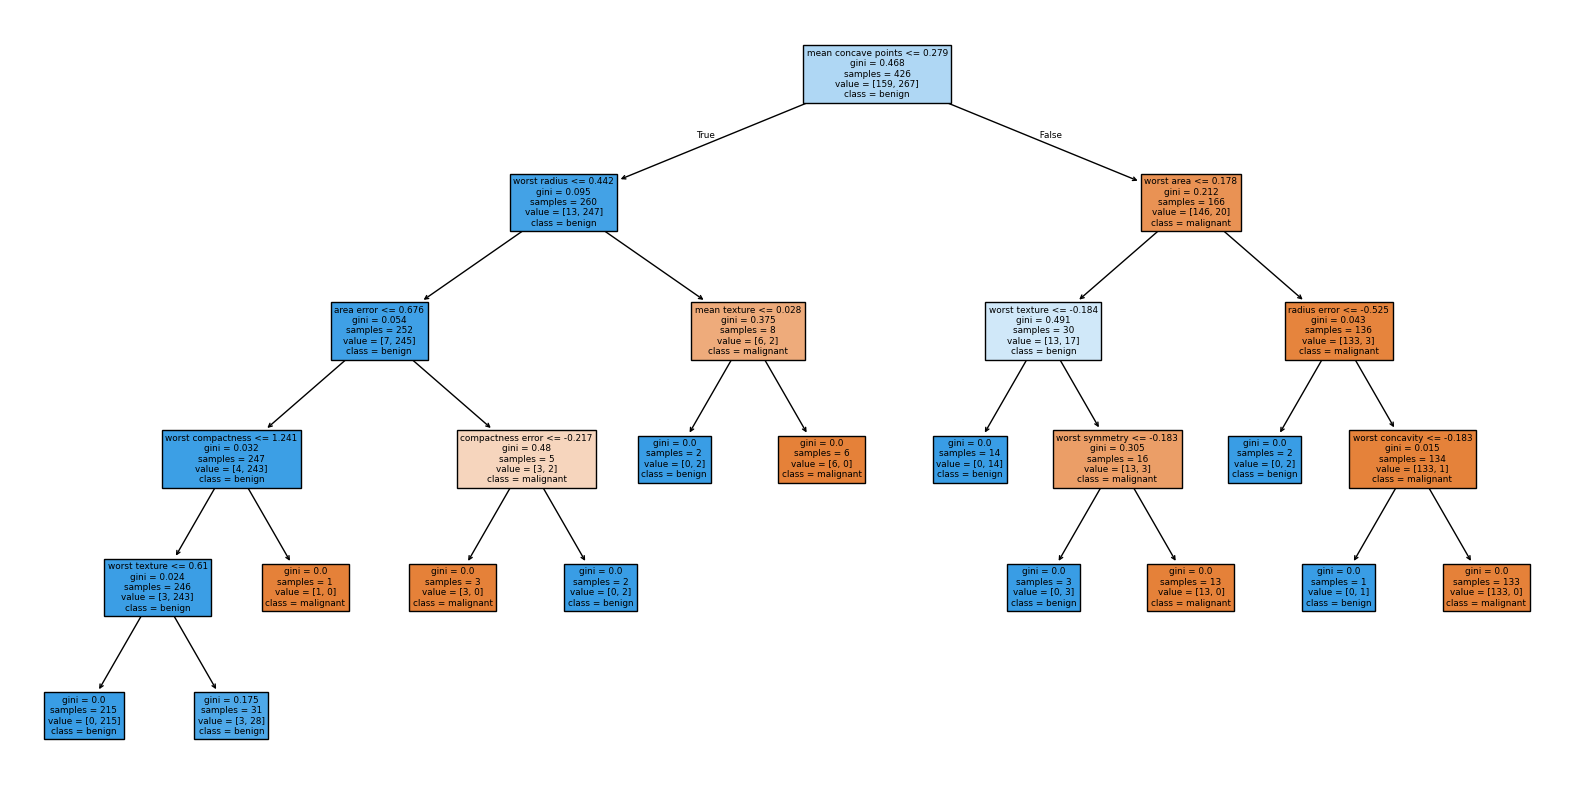

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.svm import SVC as SVM
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DecisionTree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


def printASSvalues(cm):
    print(cm)
    #print acc, sensitivity and specificity but as a percentage in xx.xx format in a single line
    print("Accuracy: ", round((cm[0][0] + cm[1][1]) / len(y_test)*100, 2), end="%, ")
    print("Sensivity: ", round(cm[0][0] / (cm[0][0] + cm[0][1])*100, 2), end="%, ")
    print("Specificity: ", round(cm[1][1] / (cm[1][0] + cm[1][1])*100, 2), end="%, ")
    print("F1 Score: ", round(2*cm[1][1] / (2*cm[1][1] + cm[0][1] + cm[1][0])*100, 2), end="%\n")
    
def testKNN(X_train, X_test, y_train, y_test, n_neighbors, weights):
    model = kNN(n_neighbors=n_neighbors, weights=weights)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: kNN, n_neighbors={n_neighbors}, weights={weights}")
    cm = confusion_matrix(y_test, y_pred)
    printASSvalues(cm)

def testSVM(X_train, X_test, y_train, y_test, kernel):
    model = SVM(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: SVM, kernel={kernel}")
    cm = confusion_matrix(y_test, y_pred)
    printASSvalues(cm)
    

def testLR(X_train, X_test, y_train, y_test, C):
    model = LR(C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: LR, C={C}")
    cm = confusion_matrix(y_test, y_pred)
    printASSvalues(cm)
    
def testDecisionTree(X_train, X_test, y_train, y_test, max_depth):
    model = DecisionTree(max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: DecisionTree, max_depth={max_depth}")
    cm = confusion_matrix(y_test, y_pred)
    printASSvalues(cm)
    plt.figure(figsize=(20,10))
    tree_vis = plot_tree(model,feature_names=features, class_names=['malignant', 'benign'], filled=True)
    plt.show()

data = load_breast_cancer()
# print(data.keys())
features = data['feature_names']
# print(features)
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

testKNN(X_train_scaled, X_test_scaled, y_train, y_test, 5, 'uniform')
testKNN(X_train_scaled, X_test_scaled, y_train, y_test, 5, 'distance')
testSVM(X_train_scaled, X_test_scaled, y_train, y_test, 'linear')
testSVM(X_train_scaled, X_test_scaled, y_train, y_test, 'rbf')
testLR(X_train_scaled, X_test_scaled, y_train, y_test, 1)
testLR(X_train_scaled, X_test_scaled, y_train, y_test, 100)
testDecisionTree(X_train_scaled, X_test_scaled, y_train, y_test, 5)